In [ ]:
from IPython.display import HTML
from IPython.display import Image 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Assignment 3 - Part 2 | Digit Recognizer
David Thor MSDS 422 - Practical Machine Learning and AI


# Libraries

In [3]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from scipy import stats
import matplotlib.gridspec as gridspec
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import glob
from PIL import Image
import PIL
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline

In [4]:
os.getcwd()

'C:\\Users\\243426\\Desktop\\MSDS\\Northwestern\\422\\Assignment 3\\Digit Recognizer'

# Part 0 - Importing Data



In [5]:
##Importing Data
trainDat = pd.read_csv('train.csv')
testDat =  pd.read_csv('test.csv')

In [6]:
trainDat.shape
testDat.shape

(28000, 784)

In [7]:
# checking variables to make sure label is the y variable
set(trainDat.columns).difference(set(testDat.columns))

{'label'}

In [8]:
y=trainDat.label.to_numpy(copy=True)
X=trainDat.loc[:,trainDat.columns!='label'].to_numpy(copy=True)
#Divide my 255 to scale pixels. Should only be bettwen 0 and 1
#X = X/255
X.shape
y.shape

(42000,)

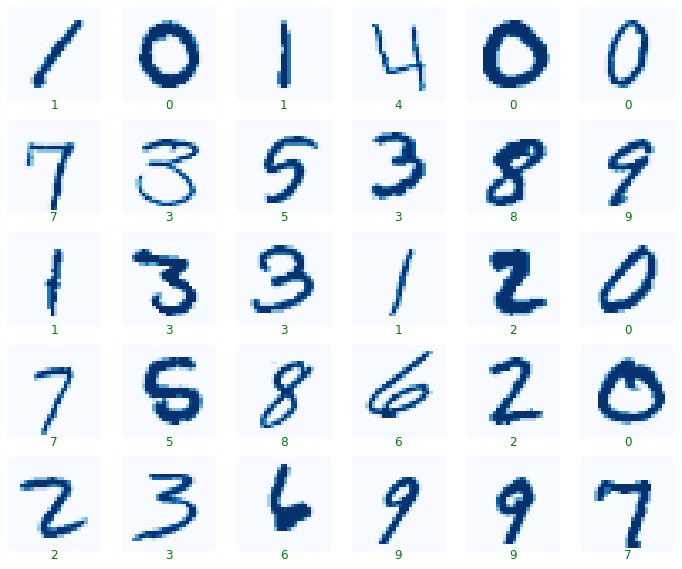

In [9]:
rows = 5 # defining no. of rows in figure
cols = 6 # defining no. of colums in figure

f = plt.figure(figsize=(2*cols,2*rows)) # defining a figure 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(X[i].reshape([28,28]),cmap="Blues") 
    plt.axis("off")
    plt.title(str(y[i]), y=-0.15,color="green")

In [ ]:
# Random split using a scikit-learn preprocessing method
# 8400 is a good 'final exam' size to validate against
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, \
        train_size=0.80, random_state=9)

Xtrain.shape
Xtest.shape
ytrain.shape
ytest.shape

# Part 1
- I first use a base model to assess the accuracy.
- I then tuned the RF model using gridSearchCV to find optimal hyperparamters
- After playing around with some parameters, I used hyperparameter settings similar to Part 1

## Summary Results
- The base model yield 100% and 96% against the training and test/final_exam data respectively
- The 'tuned' model yield 99% and 96% against the trainig and test/final_exam data respectively


## Thoughts
 - In short, I felt like to get the perfect parameters for the best results, I had to continue 'tuning' the model. Even with GridSearchCV, it was quite difficult to find the perfect parameters
 - The biggest constraint I experienced was the processing times when hypertuning

In [ ]:
# I wanted to look at the possible hyperparatmers to test with
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 10)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

In [ ]:
# Below is a base RF model
base_model = RandomForestClassifier(random_state = 42)
base_model_fit = base_model.fit(Xtrain, ytrain)
y_pred_base_train = base_model_fit.predict(Xtrain)
base_accuracy_trained_data = accuracy_score(ytrain,y_pred_base_train)
print (f'Base Model Training Data Accuracy: ',base_accuracy_trained_data)
# It's important to see how this base model compares to hypertuned models
y_pred_test_base = base_model_fit.predict(Xtest)
base_accuracy_test_data = accuracy_score(ytest,y_pred_test_base)
print (f'Base Model Final Exam Data Accuracy: ', base_accuracy_test_data)

In [ ]:
# After analyzing some of the hyper parameters from the model above
# I decided to further tune the parameters in hopes to better the model
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80],
    'max_features': ['sqrt'],
    'min_samples_leaf': [5],
    'min_samples_split': [4],
    'n_estimators': [1400]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
#This will fit and show the best parameters for the RF model
grid_search.fit(Xtrain, ytrain)
grid_search.best_params_

In [ ]:
# This will show predict and show us the accuracy of the training/test data.
best_grid = grid_search.best_estimator_
best_grid_fit = best_grid.fit(Xtrain, ytrain)
y_pred_best_train = best_grid_fit.predict(Xtrain)
accuracy_trained_data_best = accuracy_score(ytrain,y_pred_best_train)
print (f'Best Parameter Model Training Data Accuracy: ', \
       accuracy_trained_data_best)

y_pred_best_test = best_grid_fit.predict(Xtest)
accuracy_test_data_best = accuracy_score(ytest,y_pred_best_test)
print (f'Best Parameter Model Final Exam Data Accuracy: ', \
       accuracy_test_data_best)

# PCA
- I performed PCA to obtain components accounting for 75 % of the total variation.
- I then used gridsearchCV to hyper tune the RF model.
- After long processing times, I was successful with a very finite set of parameters simliar to Part 1

## Summary
- The dimenions reduced to 33 components accounting for 75% of the data
- The RF base model yield accuracy of 100% and 18% against the training and test/final_exam data, respectively
- The RF 'tuned' model yield an accuracy of 99% and 18% against the training and test/final_exam data, respecitvely

## Thoughts
- There was obviously large amounts of overfitting (high variance/low bias)
- To address this, I could've spend more time 'tuning' with different hyperparameter settings but due to long processing times and other constraints, I did not proceed with the PCA route. At one point, I let my laptop run overnight and still didn't finish identifying the best results

In [ ]:
pca=PCA(random_state=7)    #instantiating the method

In [ ]:
pcaRes = pca.fit(Xtrain)   # Fit the tranformation

In [ ]:
pcaRes.components_.shape   # 784 features projected into 784 components
pcaRes.singular_values_.shape

In [ ]:
pcaRes.explained_variance_ratio_[:20]
np.sum(pcaRes.explained_variance_ratio_)  #Should be approx 1.

In [ ]:
# This shows the number of components necessary to achieve 75% total variation
evrSum=np.cumsum(pcaRes.explained_variance_ratio_)  # cum sum of var ratios
np.where(evrSum>=0.75)[0][0]  # First index position where True

In [ ]:
skplt.decomposition.plot_pca_component_variance(pcaRes,
            target_explained_variance=0.75,
            figsize=(8,8));

### Transforming 
- Transforming the features to a space of 33 Components which should result in 75% total variation of the data

In [ ]:
#pcaRed=PCA(random_state=7, n_components=7)
pcaRed=PCA(random_state=7, n_components=0.75)  #An alternative

In [ ]:
Xred = pcaRed.fit_transform(Xtrain)

Xred.shape

In [ ]:
# I also performed the transformation on the test/final_exam data
Xtest_red = pcaRed.transform(Xtest)

In [ ]:
# Below is a base RF model
base_model = RandomForestClassifier(random_state = 42)
base_model_fit = base_model.fit(Xred, ytrain)
y_pred_base_train = base_model_fit.predict(Xred)
base_accuracy_trained_data = accuracy_score(ytrain,y_pred_base_train)
print (f'Base Model Training Data Accuracy: ',base_accuracy_trained_data)
# It's important to see how this base model compares to hypertuned models
y_pred_test_base = base_model_fit.predict(Xtest_red)
base_accuracy_test_data = accuracy_score(ytest,y_pred_test_base)
print (f'Base Model Final Exam Data Accuracy: ', base_accuracy_test_data)

In [ ]:
# After analyzing some of the hyper parameters from the model above
# I decided to further tune the parameters in hopes to better the model
# Due to long processing times, my param_grid is rather small
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80],
    'max_features': ['sqrt'],
    'min_samples_leaf': [5],
    'min_samples_split': [4],
    'n_estimators': [1400]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
#This will fit and show the best parameters for the RF model
grid_search.fit(Xred, ytrain)
grid_search.best_params_

In [ ]:
# This will show predict and show us the accuracy of the training/test data.
best_grid = grid_search.best_estimator_
best_grid_fit = best_grid.fit(Xred, ytrain)
y_pred_best_train = best_grid_fit.predict(Xred)
accuracy_trained_data_best = accuracy_score(ytrain,y_pred_best_train)
print (f'Best Parameter Model Training Data Accuracy: ', \
       accuracy_trained_data_best)

y_pred_best_test = best_grid_fit.predict(Xtest_red)
accuracy_test_data_best = accuracy_score(ytest,y_pred_best_test)
print (f'Best Parameter Model Final Exam Data Accuracy: ', \
       accuracy_test_data_best)

## Implement/Submission
- I have decided to use the base model hyper parameters without PCA because this yield the highest accuracy for both the training and test/final_exam data

In [ ]:
testDat =  pd.read_csv('test.csv')

In [ ]:
test_final_exam=testDat.to_numpy(copy=True)
#Divide my 255 to scale pixels. Should only be bettwen 0 and 1
test_final_exam = test_final_exam/255

In [ ]:
# Building/re-trainig the model for submission
base_model = RandomForestClassifier(random_state = 42)
base_model_fit = base_model.fit(Xtrain, ytrain)
y_pred_base_train = base_model_fit.predict(Xtrain)
base_accuracy_trained_data = accuracy_score(ytrain,y_pred_base_train)
print (f'Base Model Training Data Accuracy: ',base_accuracy_trained_data)
# Predicting labels using the test data ready for submission
y_pred_test_base = base_model_fit.predict(test_final_exam)
y_pred_test_base


In [ ]:
# Method to produce the submission file
def write_preds(preds, fname):
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), \
                  "Label": preds}).to_csv(fname, index=False, header=True)

In [ ]:
# Write to file your test score for submission
write_preds(y_pred_test_base, "digit_submission.csv")

# K-Means Clustering
- I used the elbow method to find the optimal K (clusters). This essentially is when the sum of squared distances (inertia) suddenly drops. This method is easiest to understand and intepret graphically.
- The first graph below is the 'Elbow Method for the components featured data'
- The Second graph below is for the 'Elbow Method for normal/large dimensioned data' (no PCA)

### Summary
- To my surprise, both the graphs looks very simliar. I double checked and made sure I passed the correct data into the fit method.
- I would say the 'elbow' or best value of K is 6 for both graphs. Basically, this means that the optimal number of clusters is 6.

### Thoughts
- Not entirely sure why both graphs are so similar. I would expect the non-PCA'ed data would have a higher optimal K because the dataset is so large and more susepctible to noise/other factors
- The processing times were decent for running these Elbow graphs compared to tuning RF models.

In [ ]:
##Elbow method for components feature data (PCA)
Sum_of_squared_distances = []
K = range(2,20)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(Xred)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show();

In [ ]:
# Elbow method for normal/large dimensioned data.
Sum_of_squared_distances = []
K = range(2,20)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(Xtrain)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show();